
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [2]:
!pip install pingouin


  Obtaining dependency information for pingouin from https://files.pythonhosted.org/packages/35/2e/8ca90e7edc93bc3d3bdf6daa6d5fc5ae4882994171c3db765365227e1d58/pingouin-0.5.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas-flavor from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/198.9 kB ? eta -:--:--
   ---------------------- ----------------- 112.6/198.9 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 198.9/198.9 kB 4.0 MB/s eta 0:00:00


In [123]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for ...
from matplotlib import pyplot as plt # used for ...
import pylab # used for ...
import pingouin as pg # used for ...

df_mh = pd.read_csv('C:/Users/70794/AnalysingData/A1_analysing_data/data for A1/MillerHadenData.csv')


In [4]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head()) # Display the first 5 rows of the df

# Check data types and information
print(df_mh.info())

   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None


In [5]:
# Q1b (code):
# Check for missing values

missing_df = pd.DataFrame(columns=df_mh.columns) # Create a new df to save rows with missing values
for index, row in df_mh.iterrows(): # for loop to check if there's missing value in each row
    if row.isnull().any():
        missing_df = missing_df.append(row, ignore_index=True) # add these rows to missing_df
print(missing_df) # Empty df means no missing values in df_mh

# Check whether there is a data point for each participant on both variables
# pandas.isnull: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html
missing_abil_iq = df_mh[['Abil', 'IQ']].isnull().sum() # Check the number of missing values
print(missing_abil_iq)

Empty DataFrame
Columns: [Participant, Abil, IQ, Home, TV]
Index: []
Abil    0
IQ      0
dtype: int64


array([[<Axes: title={'center': 'Abil'}>, <Axes: title={'center': 'IQ'}>],
       [<Axes: title={'center': 'Home'}>, <Axes: title={'center': 'TV'}>]],
      dtype=object)

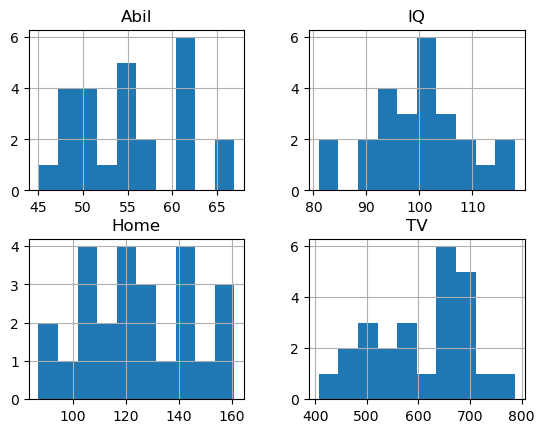

In [132]:
# Q1c (code):
# Check data distribution
df_mh.hist(['Abil','IQ','Home','TV'])

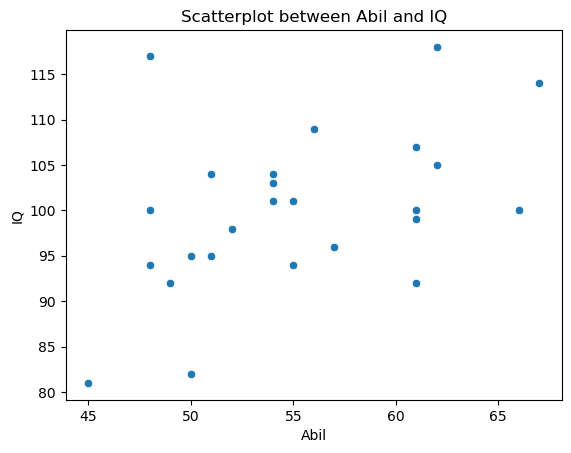

In [133]:
# Q1d (code):
# Scatter plot
sns.scatterplot(x='Abil', y='IQ', data=df_mh)
plt.title('Scatterplot between Abil and IQ')
plt.show()

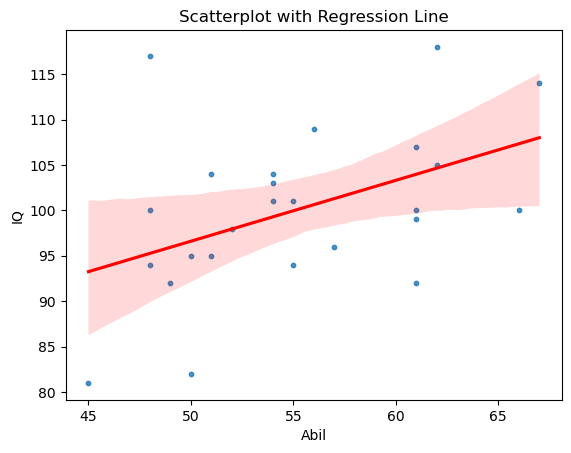

In [134]:
# Q1e (code):
# Correlation line
x = df_mh['Abil']
y = df_mh['IQ']

sns.regplot(x=x, y=y, scatter_kws={'s': 10}, line_kws={'color': 'red'})

plt.title('Scatterplot with Regression Line')
plt.xlabel('Abil')
plt.ylabel('IQ')

plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [173]:
# Q2a (answer with words):


### Q2a
Pearson. Because it's a normal distribution.

In [135]:
# Q2b (code):
corr_mh = pg.corr(x, y)
print(corr_mh)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


In [187]:
# Q2c (answer with words):

### Q2c
In the 25 samples, of the two variables Abil and IQr (correlation coefficient) is 0.45117, indicating a moderate positive correlation.
CI95% is [0.07, 0.72]. This means that we are 95% confident that the true correlation is somewhere between 0.07 and 0.72.
p-val is 0.023593, which is less than the commonly used significance level of 0.05. This suggests that the correlation is statistically significant.
BF10 is 2.804, suggesting some evidence in favor of the alternative hypothesis.
Power is 0.640299, indicating a relatively high probability of correctly detecting a true correlation if it exists.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [201]:
# Q3a (answer in words):


### Q3a
H0: There is no association between reading ability (Rank_Abil) and the amount of time spent reading at home per week (Rank_Home).

H1：There is a significant association between reading ability (Rank_Abil) and the amount of time spent reading at home per week (Rank_Home). 

In [190]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for ....
from scipy.stats import chi2_contingency ##used for ....

# Define the rounded average for Reading Ability and Home
rounded_avg_ability = round(df_mh['Abil'].mean())
rounded_avg_home = round(df_mh['Home'].mean())
# Calculation of average values
rounded_avg_ability = int(df_mh['Abil'].mean() + 0.5)
rounded_avg_home = int(df_mh['Home'].mean() + 0.5)

# Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'Low' if x <= rounded_avg_ability else 'High')

# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Infrequent' if x <= rounded_avg_home else 'Frequent')

df_mh

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Infrequent
2,3,45,81,108,640,Low,Infrequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Infrequent
5,6,62,105,161,407,High,Frequent
6,7,61,92,138,463,High,Frequent
7,8,55,101,119,717,Low,Infrequent
8,9,62,118,155,643,High,Frequent
9,10,61,99,121,674,High,Infrequent


In [14]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
print("Contingency Matrix:")
print(contingency_matrix)


Contingency Matrix:
Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [193]:
# Q3d (code):

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_matrix)

# print values from chi2
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print('These are the expected frequencies:')
print(expected)

if p < 0.05:#Determine if H0 is valid by p_value
    print("The observed differences are statistically significant - H0 is rejected")
else:
    print("The observed differences are not statistically significant - H1 is rejected")

Chi-square Statistic: 6.500270562770561
P-value: 0.010785807794066234
These are the expected frequencies:
[[4.4 5.6]
 [6.6 8.4]]
The observed differences are statistically significant - H0 is rejected


In [195]:
# Q3e (answer in words):

### Q3e
Since the p-value is less than 0.05, we reject the null hypothesis. The differences in category distribution are statistically significant, suggesting a significant association between these variables.

The Chi-square test suggests that the data distribution didn't occur by chance, indicating a relationship between the variables.

Expected frequencies show what would occur without an association. 

Rejecting the null hypothesis means the observed differences signify a real association, not random variation.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

### Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [17]:

import pandas as pd # used for ...
from scipy import stats #
import numpy as np #
import matplotlib.pyplot as plt ##
import seaborn as sns #

# Load the data
df_evaluators = pd.read_csv('C:/Users/70794/AnalysingData/A1_analysing_data/data for A1/evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [18]:
df_evaluators.describe()

,eval_id,age,sex
count,39.000000,34.000000,34.000000
mean,20.000000,30.852941,1.882353
std,11.401754,6.238358,0.327035
min,1.000000,23.000000,1.000000
25%,10.500000,27.000000,2.000000
50%,20.000000,29.000000,2.000000
75%,29.500000,32.750000,2.000000
max,39.000000,48.000000,2.000000


In [19]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
df_evaluators_desc = df_evaluators['age'].describe()
# read std from .describe()
std_dev_age = df_evaluators_desc['std']
print(f"mean age: {mean_age}")
print(f"standard deviation of age: {std_dev_age}")

mean age: 30.852941176470587
standard deviation of age: 6.238358141327351


In [20]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
# change 1 & 2 to male & female
df_evaluators_sex = df_evaluators['sex'].replace({1: 'Male', 2: 'Female'})
male_count = len(df_evaluators_sex[df_evaluators_sex == 'Male'])
female_count = len(df_evaluators_sex[df_evaluators_sex == 'Female'])
# Combined the results and create a dataframe
sex_counts = pd.DataFrame({'Sex': ['Male', 'Female'], 'Count': [male_count, female_count]})

# Display the counts with updated labels
sex_counts

,Sex,Count
0,Male,4
1,Female,30


### Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [40]:
# Load ratings data
df_ratings = pd.read_csv('C:/Users/70794/AnalysingData/A1_analysing_data/data for A1/ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [186]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
filtered_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = filtered_ratings.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])].reset_index()

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category']).reset_index(drop=True)

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
0,1,hire,6.000000,listened
1,1,impression,7.000000,listened
2,1,intellect,6.000000,listened
3,2,hire,4.000000,listened
4,2,impression,4.666667,listened


### Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [154]:
# Q6a (answer in words):
# Null hypothesis:

# Alternative hypothesis:

# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

### Q6a
Null Hypothesis (H0):

There is no significant difference between overall ratings between evaluators who listened to resume pitches (μ1) and evaluators who read the resume pitches (μ2).

Alternative Hypothesis (H1):

Alternatively, there will be a significant difference between overall ratings between evaluators who listened to resume pitches (μ1) and evaluators who read the resume pitches (μ2).

In [202]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.

### Q6b

Which t-test should we choose, one-tail or two-tail? Explian why.

two-tail, the alternative hypothesis is non-directional.

In [203]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?

### Q6c
What are the independent variable and the dependent variable here?

independent variable: Category. Dependent variable: Rating


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [204]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for ...

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].describe()

# Create df which group by Category
sub_df = ratings2.groupby("Category")
# Create seperate df for all 3 categories
impression = sub_df.get_group("impression")
hire = sub_df.get_group("hire")
intellect = sub_df.get_group("intellect")

# Create df for 2 conditions (listened and read) in 3 categories
#intellect
intellect_listen = intellect[(intellect['Category'] == 'intellect') & (intellect['condition'] == 'listened')]
intellect_read = intellect[(intellect['Category'] == 'intellect') & (intellect['condition'] == 'read')]
#hire
hire_listen = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]
hire_read = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]
#impression
impression_listen = impression[(impression['Category'] == 'impression') & (impression['condition'] == 'listened')]
impression_read = impression[(impression['Category'] == 'impression') & (impression['condition'] == 'read')]

# Test for normal distribution (Shapiro-Wilk test)
score_shapiro_impression, p_val_shapiro_impression = stats.shapiro(impression['Rating'])
score_shapiro_hire, p_val_shapiro_hire = stats.shapiro(hire['Rating'])
score_shapiro_intellect, p_val_shapiro_intellect = stats.shapiro(intellect['Rating'])

# Test for homogeneity of variances (Levene's test)
# Test for impression & hire
score_levene_impression_hire, p_val_levene_impression_hire = stats.levene(impression['Rating'], hire['Rating'])
# Test for impression & intellct
score_levene_impression_intellect, p_val_levene_impression_intellect = stats.levene(impression['Rating'], intellect['Rating'])
# Test for hire & intellct
score_levene_hire_intellect, p_val_levene_hire_intellect = stats.levene(hire['Rating'], intellect['Rating'])
# Test for impression, listen & read
score_levene_impression_l_r, p_val_levene_impression_l_r = stats.levene(impression_listen['Rating'], impression_read['Rating'])
# Test for hire, listen & read
score_levene_hire_l_r, p_val_levene_hire_l_r = stats.levene(hire_listen['Rating'], hire_read['Rating'])
# Test for intellect, listen & read
score_levene_intellect_l_r, p_val_levene_intellect_l_r = stats.levene(intellect_listen['Rating'], intellect_read['Rating'])

# Independent t-tests
# Test for impression, listen & read
ttest_score_impression, p_val_impression = stats.ttest_ind(impression_listen['Rating'], impression_read['Rating'])
# Test for hire, listen & read
ttest_score_hire, p_val_hire = stats.ttest_ind(hire_listen['Rating'], hire_read['Rating'])
# Test for intellect, listen & read
ttest_score_intellect, p_val_intellect = stats.ttest_ind(intellect_listen['Rating'], intellect_read['Rating'])

# Create a dictionary to save the results of all the test
shapiro_results = {'intellect': p_val_shapiro_intellect, 'impression': p_val_shapiro_impression, 'hire': p_val_shapiro_hire}
levene_results = {'impression_hire': p_val_levene_impression_hire, 'impression_intellect': p_val_levene_impression_intellect,
                  'hire_intellect': p_val_levene_hire_intellect,'impression listened read':p_val_levene_impression_l_r,
                  'hire listened read':p_val_levene_hire_l_r,'intellect listened read':p_val_levene_intellect_l_r}
ttest_results = {'intellect': p_val_intellect, 'impression': p_val_impression, 'hire': p_val_hire}

# Transfer to df
shapiro_results = pd.DataFrame(list(shapiro_results.items()), columns=['Variable', 'Shapiro_p_value'])
levene_results = pd.DataFrame(list(levene_results.items()), columns=['Comparison', 'Levene_p_value'])
ttest_results = pd.DataFrame(list(ttest_results.items()), columns=['Variable', 'TTest_p_value'])

# print results
print(f'Rating Description: \n{ratings_desc}')

print(f'Shapiro Results:\n{shapiro_results}')

print(f'Levene Results: \n{levene_results}')

print(f'T-Test Results: \n{ttest_results}')


Rating Description: 
                      count      mean       std       min       25%       50%  \
Category   condition                                                            
hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
           read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
           read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
           read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   

                           75%       max  
Category   condition                      
hire       listened   7.000000  8.000000  
           read       4.000000  7.000000  
impression listened   7.333333  8.666667  
           read       5.333333  7.333333  
intellect  listened   6.000000  9.000000  
           read       4.66666

In [205]:
#Q7b (answer in words):


### Q7b
### descriptive statistics
For the "listened" condition under the category "hire", there are 21 observations. The mean is 4.71, the standard deviation is 2.26, the minimum value is 0, the 25% quartile is 4, the median is 5, the 75% quartile is 7, and the maximum value is 8.

For the "read" condition under the "hire" category, there were 18 observations. The mean is 2.89, the standard deviation is 2.05, the minimum value is 0, the 25% quartile is 1.25, the median is 2, the 75% quartile is 4, and the maximum is 7.

For the "listened" condition under the "expression" category, there were 21 observations. The mean is 5.97, the standard deviation is 1.92, the minimum value is 2.33, the 25% quartile is 4.67, the median is 6.67, the 75% quartile is 7.33, and the maximum value is 8.67.

For the "read" condition under the "expression" category, there were 18 observations. The mean was 4.07, the standard deviation was 2.23, the minimum value was 0.33, the 25% quartile was 2.17, the median was 4.5, the 75% quartile was 5.33, and the maximum value was 7.33.

For the "listened" condition under the "intellect" category, there were 21 observations. The mean was 5.63, the standard deviation was 1.61, the minimum value was 2.33, the 25% quartile was 5, the median was 5.67, the 75% quartile was 6, and the maximum value was 9.

For the "read" condition under the category "intellect", there were 18 observations. The mean was 3.65, the standard deviation 1.91, the minimum value 0.67, the 25% quartile 2.08, the median 3.67, the 75% quartile 4.67, and the maximum value 7.

### Shapiro-Wilk test
For the variable "intellect", the Shapiro-Wilk test has a p-value of 0.518267, which is relatively large, indicating that we do not have enough evidence to reject that the data for "intellect" are not from a normal distribution.

For the variable "expression", the Shapiro-Wilk test has a p-value of 0.172387, which is also large, indicating that we do not have enough evidence to reject that the data for "expression" are not from a normal distribution.

For the variable "hire", the Shapiro-Wilk test has a p-value of 0.047104, which is small and may be below the commonly chosen significance level (e.g. 0.05). Therefore, we may have enough evidence to reject the data for "hire" as coming from a normal distribution.

### Levene's test
The comparison between "impression" and "hire" groups has a Levene p-value of 0.791976, indicating that there is not enough evidence to reject the hypothesis that the variances of these groups are equal.

The comparison between "impression" and "intellect" groups has a Levene p-value of 0.354986, suggesting that we don't have enough evidence to reject the hypothesis of equal variances.

The comparison between "hire" and "intellect" groups has a Levene p-value of 0.234238, indicating that there is not enough evidence to reject the hypothesis that the variances are different between "hire" and "intellect."

The comparison "impression listened read" has a Levene p-value of 0.535896, suggesting that there is not enough evidence to reject the hypothesis that the variances of the "impression listened" and "impression read" groups are different.

The comparison "hire listened read" has a Levene p-value of 0.745845, indicating that we don't have enough evidence to reject the hypothesis that the variances of the "hire listened" and "hire read" groups are different.

The comparison "intellect listened read" has a Levene p-value of 0.349462, suggesting that there is not enough evidence to reject the hypothesis that the variances of the "intellect listened" and "intellect read" groups are different.

### Independent t-tests
For the variable "intellect," the T-test p-value is 0.001144. This p-value is less than the conventional significance level (e.g., 0.05), suggesting that there is enough evidence to reject the null hypothesis that the means of two independent groups (possibly different conditions or categories) for "intellect" are equal.

For the variable "impression," the T-test p-value is 0.007091. Similarly, this p-value is less than the conventional significance level, indicating that there is enough evidence to reject the null hypothesis that the means of two independent groups for "impression" are equal.

For the variable "hire," the T-test p-value is 0.012675. Again, this p-value is less than the conventional significance level, suggesting that there is enough evidence to reject the null hypothesis that the means of two independent groups for "hire" are equal.

In summary, based on these T-test results, there is statistical evidence to suggest that there are significant differences in means between the groups for "intellect," "impression," and "hire."